In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
from sklearn.model_selection import KFold


from common_functions import foo
mpl.style.use('classic')

%load_ext autoreload
%autoreload 2
results = "results"

In [2]:
from common_functions import latexify, format_axes, tableau20blind
latexify(14, 8)

In [3]:
params = {
    'lines.linewidth': 2,
    'lines.color': 'k',
#     'boxplot.boxprops.linewidth': 20,
    'boxplot.boxprops.color': 'k',
    'patch.linewidth': 2,
    'legend.fontsize': 14 + 4,
    'legend.framealpha': .6,
    'axes.titlesize': 14 + 4,
    "axes.labelsize": 14 + 4,
    'xtick.labelsize': 14 + 4,
    'ytick.labelsize': 16 + 4,
#     'axes.labelweight': 'bold',
    'axes.linewidth': 2,
#     'font.weight': 'bold'
    
}
matplotlib.rcParams.update(params)

In [4]:
datafile = '../data/beijinga_scaled.csv'

In [5]:
splits = 6
datadf = pd.read_csv(datafile, index_col=0)
allStations = datadf['station_id'].unique()
allStations.sort()

kfout = KFold(n_splits=splits, shuffle=True, random_state=0)
kfin = KFold(n_splits=splits - 1, shuffle=True, random_state=0)
datadf.head()

,latitude,longitude,ts,station_id,PM2.5
0,0.58292,0.17557,0.000000,1001.0,156.250000
0,0.58292,0.17557,0.002747,1001.0,24.833333
0,0.58292,0.17557,0.005495,1001.0,72.583333
0,0.58292,0.17557,0.008242,1001.0,30.043478
0,0.58292,0.17557,0.010989,1001.0,23.083333


In [6]:
df = foo(30, 'results', True)
lastKDays = 30

In [7]:
df.groupby("reg").mean()

,kout,kin,day,rmse,lastKDays,seed
reg,,,,,,
gp,2.498016,2.001424,163.983420,20.665598,30.0,-1.000000
gp_rd,2.499959,1.999573,163.968984,24.380714,30.0,2.000305
knn,2.500000,2.000000,164.000000,30.679426,30.0,-1.000000
knn_rd,2.500000,2.000000,164.000000,30.541583,30.0,2.000000
qbc,2.500000,2.000000,164.000000,22.671395,30.0,-1.000000
qbc_rd,2.500000,2.000000,164.000000,24.136366,30.0,2.000000


In [8]:
for ix, tempdf in df.groupby(["kout", "kin"]):
    
    print ("kout, kin :", *ix)
    tempdf2 = tempdf.groupby("reg").mean()
    print (tempdf2)#.loc["gp"]-tempdf2.loc["qbc"])

kout, kin : 0 0
        kout  kin         day       rmse  lastKDays  seed
reg                                                      
gp       0.0  0.0  164.000000  17.802756       30.0  -1.0
gp_rd    0.0  0.0  163.864717  15.528422       30.0   2.0
knn      0.0  0.0  164.000000  29.288422       30.0  -1.0
knn_rd   0.0  0.0  164.000000  29.887908       30.0   2.0
qbc      0.0  0.0  164.000000  21.406033       30.0  -1.0
qbc_rd   0.0  0.0  164.000000  22.579522       30.0   2.0
kout, kin : 0 1
        kout  kin         day       rmse  lastKDays      seed
reg                                                          
gp       0.0  1.0  163.779817  18.730737       30.0 -1.000000
gp_rd    0.0  1.0  163.871184  23.861666       30.0  2.001832
knn      0.0  1.0  164.000000  29.395858       30.0 -1.000000
knn_rd   0.0  1.0  164.000000  31.588047       30.0  2.000000
qbc      0.0  1.0  164.000000  20.735624       30.0 -1.000000
qbc_rd   0.0  1.0  164.000000  26.489254       30.0  2.000000
kout, ki

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

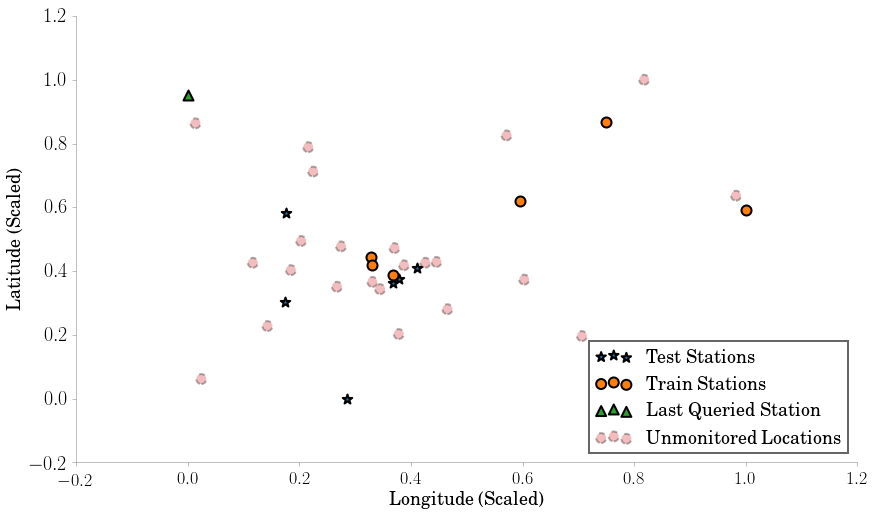

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

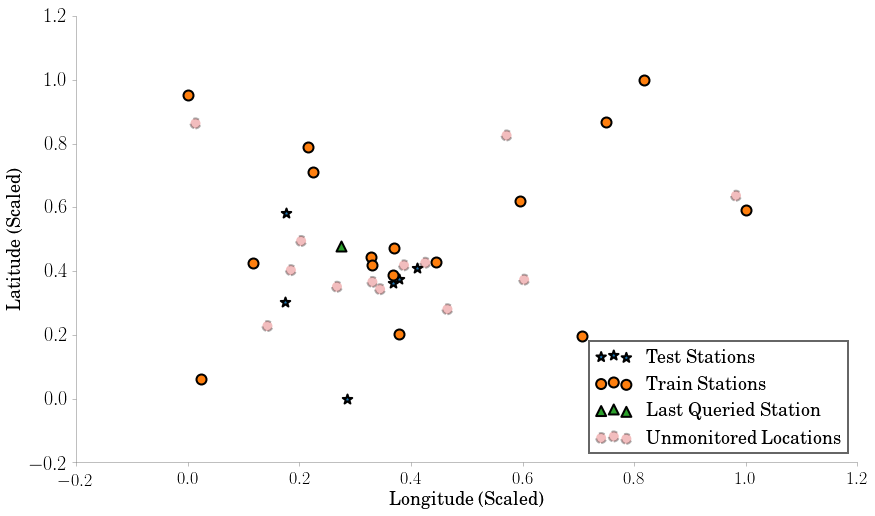

In [12]:
for reg in ['gp', 'qbc']: # (3, 0), (1,0), (1,1), (2,0), (2, 1), (5,0)
    for kout, kin in [ (2, 4), (5, 1)]:
        sts_ftrain_index, sts_test_index = list(kfout.split(allStations))[kout]
        sts_train_index, sts_val_index = list(kfin.split(sts_ftrain_index))[kin]

        # get the station ids
        sts_test = list(allStations[sts_test_index]) # test
        sts_val = list(allStations[sts_ftrain_index[sts_val_index]]) # train
        sts_pool = list(allStations[sts_ftrain_index[sts_train_index]]) # pool
        sts_train = [] # pool

        grouped = datadf.groupby("station_id")

        queried_stations = np.load(f"../exp2/src/{results}/{lastKDays}/final_{reg}/{kout}_{kin}/stations.npy")
        for qix, qStation in enumerate(queried_stations):
            # get the index of the stations
            sts_pool.remove(qStation)
            sts_train = [qStation]
            
            
            for ix, (marker, strStations, stations) in enumerate(zip(
                ["*", 'o', '^', 'o'],
                ["Test Stations", "Train Stations", "Last Queried Station", "Unmonitored Locations"], 
                [sts_test, sts_val, sts_train, sts_pool]
            )):

                longs = []
                lats = []
                for station in stations:
                    tempdf = grouped.get_group(station)
                    long = tempdf["longitude"].mean()
                    lat = tempdf["latitude"].mean()

        #             print ("done")
        #             print (long)
        #             assert (len(long) == 1)
        #             assert (len(lat) == 1)

                    longs.append(long)
                    lats.append(lat)

                if ix == 3:
                    linestyle = '--'
                    alpha = .3
                else:
                    alpha = 1
                    linestyle = '-'
                if qix in [len(queried_stations)-1, 0]:
                    plt.scatter(longs, lats, 
                                label=strStations, 
                                c=tableau20blind[ix * 2],
                                s=100,
                                marker=marker,
                                linestyle = linestyle, 
                                alpha = alpha,
                               )
            if qix in [len(queried_stations)-1, 0]:
                plt.legend(loc="upper")
                plt.xlabel("Longitude (Scaled)")
                plt.ylabel("Latitude (Scaled)")
#                 plt.title(f"{reg}")
                format_axes(plt.gca())
                if qix == 0:
                    qqix = "start"
                else:
                    qqix = "last"
                plt.savefig(f'./plts/{reg}_kout{kout}_kin{kin}_{qqix}.pdf')
                plt.show()
            sts_val.append(qStation)